# 23 Years of Exchange Rate Dynamics: A Visual Analysis of EUR vs USD and RUB

This data science project aims to analyze the exchange rate dynamics of the Euro (EUR) against the US Dollar (USD) and the Russian Ruble (RUB) from 1999 to present, with a focus on visualizing the results. The daily exchange rates dataset was provided and updated by Darya Chemkaeva on Kaggle, containing data from the European Central Bank Statistical Data Warehouse.

Our approach involved analyzing the impact of quantitative easing (QE) by the US Federal Reserve on the EUR-USD exchange rate and studying the performance of the RUB against the EUR over the past 23 years. The findings indicate that all four rounds of QE had no significant impact on the EUR-USD exchange rate, with the rate recovering or depreciating in the following years. Meanwhile, the RUB has depreciated over three times against the EUR due to global and local crises affecting the Russian economy.

Overall, our project provides valuable insights into the exchange rate dynamics of the EUR, USD, and RUB, highlighting the impact of significant economic events on currency performance.

In [1]:
# Import libraries
import pandas as pd

In [2]:
# Read the data set
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [3]:
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-01-27,1.5289,1.9558,5.5104,1.4479,1.0017,7.3690,NaN,23.826,7.4378,...,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.7020,20.4365,1.0865,18.7185
1,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,...,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127
2,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,...,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
3,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,...,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
4,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,...,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6225,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6226,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6227,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6229 non-null   object 
 1   [Australian dollar ]      6229 non-null   object 
 2   [Bulgarian lev ]          5827 non-null   object 
 3   [Brazilian real ]         5961 non-null   object 
 4   [Canadian dollar ]        6229 non-null   object 
 5   [Swiss franc ]            6229 non-null   object 
 6   [Chinese yuan renminbi ]  5961 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6229 non-null   object 
 9   [Danish krone ]           6229 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6229 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6229 non-null   object 
 14  [Croatia

Most columns are stored as non-numeric.

## Cleaning the Data

First we will rename the columns that we will use later.

In [5]:
# Rename the columns that will be the focus of the project
exchange_rates.rename(columns={'[US dollar ]': 'USD',
                               'Period\\Unit:': 'Time',
                              '[Russian rouble ]': 'RUB'},
                      inplace=True)

Then we will convert Time to datetime data type.

In [6]:
# Converting to datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sorting in ascending order
exchange_rates.sort_values('Time', inplace=True)

# Resetting the index
exchange_rates.reset_index(drop=True, inplace=True)

exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],RUB,[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],USD,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,...,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597
6225,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,...,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
6226,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,...,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
6227,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,...,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127


## EUR to US Dollar

We start with the EUR to USD data.

In [7]:
# Isolating the USD and Time columns
euro_to_dollar = exchange_rates.copy()[['Time', 'USD']]
euro_to_dollar

,Time,USD
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6224,2023-01-23,1.0871
6225,2023-01-24,1.0858
6226,2023-01-25,1.0878
6227,2023-01-26,1.0895


In [8]:
euro_to_dollar['USD'].value_counts(dropna=False)

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.3818     1
1.3591     1
1.3405     1
1.3580     1
1.0865     1
Name: USD, Length: 3718, dtype: int64

We will drop the rows with missing values.

In [9]:
# Dropping the rows with '-' values
euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['USD'] == '-'].index, inplace=True)
euro_to_dollar

,Time,USD
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6224,2023-01-23,1.0871
6225,2023-01-24,1.0858
6226,2023-01-25,1.0878
6227,2023-01-26,1.0895


In [10]:
# Converting USD to float
euro_to_dollar['USD'] = euro_to_dollar['USD'].astype('float')
euro_to_dollar

,Time,USD
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6224,2023-01-23,1.0871
6225,2023-01-24,1.0858
6226,2023-01-25,1.0878
6227,2023-01-26,1.0895


We will make a preliminary plot to see if we need to clean the data further.

In [11]:
# Importing libraries for plotting
import matplotlib.pyplot as plt

import matplotlib.style as style
style.use("fivethirtyeight") # We will use fivethirtyeight style for visualisation

%matplotlib inline
# Enables Jupyter to display graphs

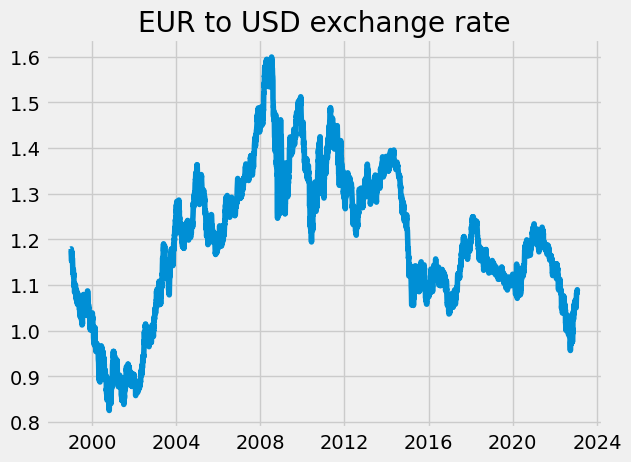

In [12]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['USD'])
plt.title('EUR to USD exchange rate')
plt.show()

To smooth the daily variations we will calculate and use the 30-day moving average further on.

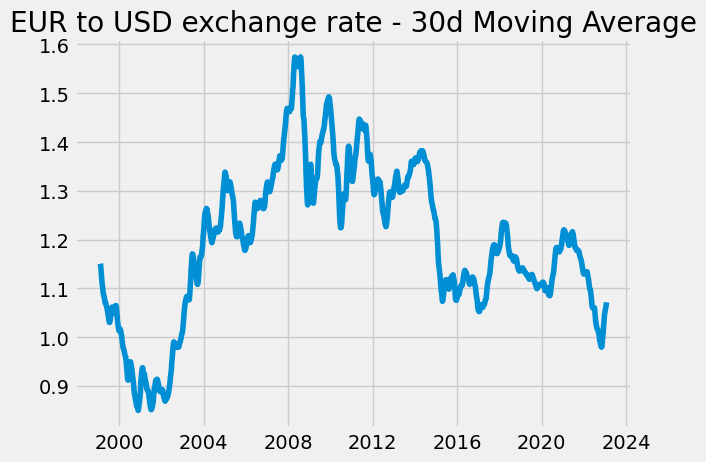

In [13]:
euro_to_dollar['30d_MA'] = euro_to_dollar['USD'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['30d_MA'])
plt.title('EUR to USD exchange rate - 30d Moving Average')
plt.show()

## Plotting EUR to USD exchange rate

We will explore and visualise how the EUR/USD exchange rate changed following the novel form of monetary policy used by the US Federal Reserve System after the 2007-08 financial crisis, known as Quantitative Easing (QE), which had a major impact on the US and global economy.

QE was implemented in four rounds:
- QE1: from November 2008 to March 2010
- QE2: from November 2010 to June 2012
- QE3: from September 2012 to October 2014
- QE4: from March 2020 to March 2022

First, we divide the dataset into 4 subsets according to the duration of the QEs.

In [14]:
qe1 = euro_to_dollar[euro_to_dollar['Time'].between('2008-11-25', '2010-03-31', inclusive='both')]
qe2 = euro_to_dollar[euro_to_dollar['Time'].between('2010-11-03', '2012-06-29', inclusive='both')]
qe3 = euro_to_dollar[euro_to_dollar['Time'].between('2012-09-13', '2014-10-29', inclusive='both')]
qe4 = euro_to_dollar[euro_to_dollar['Time'].between('2020-03-15', '2022-03-22', inclusive='both')]
# Sources of exact start and finish dates: seekingalpha.com, yardeni.com

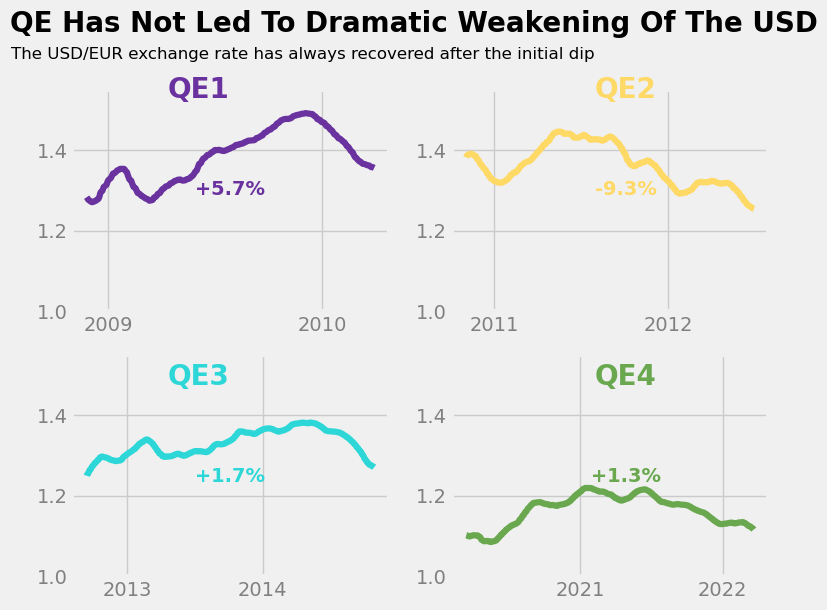

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,6)) # Set 4 subplots and figure size

axes=[ax1, ax2, ax3, ax4]
qes=[qe1, qe2, qe3, qe4]
line_colors =['#6a329f', '#ffd966', '#2ed7d7', '#6aa84f'] # Сreate color map
rate_change = []

for ax, qe, line_color in zip(axes, qes, line_colors): # Draw 4 subplots
    ax.plot(qe['Time'],
         qe['30d_MA'],
           color=line_color, linewidth=4.5)
    ax.set_ylim((1,1.55)) # Set max and min y values for each subplot for visual conformity
    ax.tick_params(axis="both", colors="grey") # Change color of ticks to grey
    
    # Retrieving rate increase or decrease over the period
    rate = round(((qe.iloc[-1,-1] / qe.iloc[0, -1] - 1) * 100), 1)
    rate_change.append(str(rate) + '%')
    
# Reduce and rename x values on graphs
ax1.set_xticks(['2009-01-01', '2010-01-01'], ["2009", "2010"])
ax2.set_xticks(['2011-01-01', '2012-01-01'], ["2011", "2012"])
ax3.set_xticks(['2013-01-01', '2014-01-01'], ["2013", "2014"])
ax4.set_xticks(['2021-01-01', '2022-01-01'], ["2021", "2022"])

# Add title to each subplot
ax1.text(-0.8, 2.2, 'QE1',  size=20, weight='bold', color=line_colors[0],
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax2.text(0.55, 2.2, 'QE2',  size=20, weight='bold', color=line_colors[1],
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax3.text(-0.8, 0.9, 'QE3',  size=20, weight='bold', color=line_colors[2],
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax4.text(0.55, 0.9, 'QE4',  size=20, weight='bold', color=line_colors[3],
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Add rate change to the plot
ax1.text(-0.7, 1.75, s=('+' + rate_change[0]),color=line_colors[0], weight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax2.text(0.55, 1.75, s=(rate_change[1]),color=line_colors[1], weight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax3.text(-0.7, 0.45, s=('+' + rate_change[2]),color=line_colors[2], weight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax4.text(0.55, 0.45, s=('+' + rate_change[3]),color=line_colors[3], weight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Add title to the plot
ax1.text(-0.12, 2.5, 'QE Has Not Led To Dramatic Weakening Of The USD',  size=20, weight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Add subtitle to the plot
ax1.text(-0.47, 2.36, 'The USD/EUR exchange rate has always recovered after the initial dip',  size=12,
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.show()

In summary, four rounds of QE do not seem to have significantly weakened the exchange rate power of the US dollar against the euro, with the EUR-USD exchange rate recovering or even falling (during QE2) in the following 1.5-2 years after the start of the QE round.

## EUR to Russian ruble

Next, we look at the EUR/RUB exchange rate over the years.

In [16]:
# Isolating the RUB and Time columns
eur_to_rub = exchange_rates.copy()[['Time', 'RUB']]
eur_to_rub

,Time,RUB
0,1999-01-04,25.2875
1,1999-01-05,26.5876
2,1999-01-06,27.4315
3,1999-01-07,26.9876
4,1999-01-08,27.2075
...,...,...
6224,2023-01-23,NaN
6225,2023-01-24,NaN
6226,2023-01-25,NaN
6227,2023-01-26,NaN


In [17]:
eur_to_rub['RUB'].value_counts(dropna=False)

NaN        235
-           62
40.6500      4
35.2250      4
39.6750      4
          ... 
34.7170      1
34.6410      1
34.5840      1
34.6900      1
41.5750      1
Name: RUB, Length: 5706, dtype: int64

We will drop the rows with missing values.

In [18]:
# Dropping the rows with '-' and NaN values
eur_to_rub.drop(eur_to_rub[eur_to_rub['RUB'] == '-'].index, inplace=True)
eur_to_rub.dropna(axis=0, inplace=True)
eur_to_rub

,Time,RUB
0,1999-01-04,25.2875
1,1999-01-05,26.5876
2,1999-01-06,27.4315
3,1999-01-07,26.9876
4,1999-01-08,27.2075
...,...,...
5989,2022-02-23,90.8791
5990,2022-02-24,95.7175
5991,2022-02-25,92.5673
5992,2022-02-28,115.4842


In [19]:
# Converting RUB to float
eur_to_rub['RUB'] = eur_to_rub['RUB'].astype('float')
eur_to_rub

,Time,RUB
0,1999-01-04,25.2875
1,1999-01-05,26.5876
2,1999-01-06,27.4315
3,1999-01-07,26.9876
4,1999-01-08,27.2075
...,...,...
5989,2022-02-23,90.8791
5990,2022-02-24,95.7175
5991,2022-02-25,92.5673
5992,2022-02-28,115.4842


We will make a preliminary plot to see if we need to clean the data further.

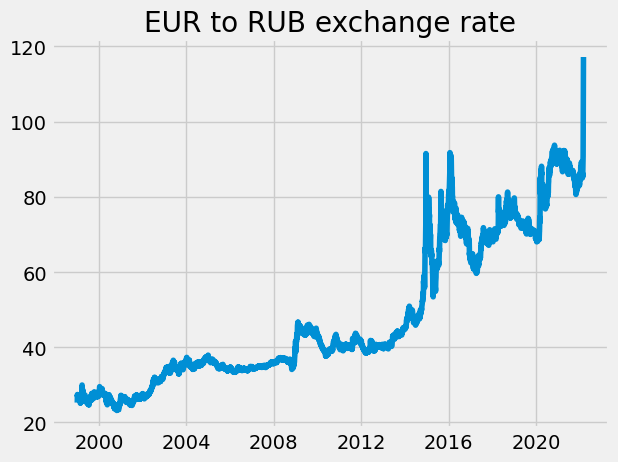

In [20]:
plt.plot(eur_to_rub['Time'],
         eur_to_rub['RUB'])
plt.title('EUR to RUB exchange rate')
plt.show()

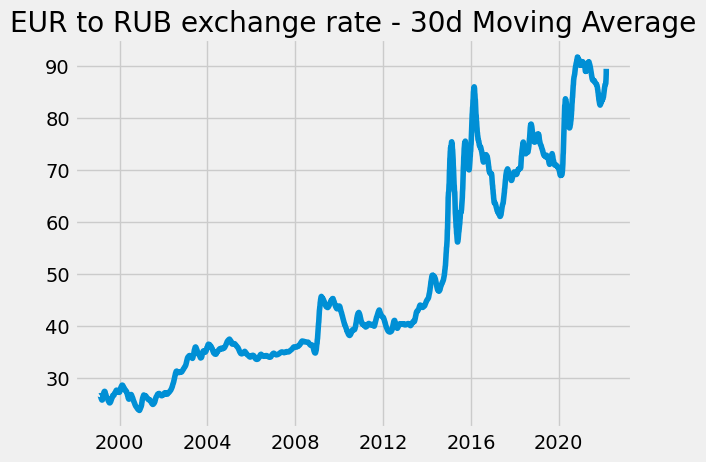

In [21]:
# Plotting the 30-day moving average
eur_to_rub['30d_MA'] = eur_to_rub['RUB'].rolling(30).mean()
plt.plot(eur_to_rub['Time'],
         eur_to_rub['30d_MA'])
plt.title('EUR to RUB exchange rate - 30d Moving Average')
plt.show()

## Plotting EUR to RUB exchange rate

We will explore and visualise some of the major economic and political events that may have had a significant impact on the ruble, such as
- The bursting of the dot.com bubble (2001)
- The global financial crisis (2008-09)
- The annexation of Crimea and subsequent economic sanctions (2014-15)
- COVID-19 (2020-21)

In [22]:
# Calculating the percantage change in EUR-RUB exchange rate for the above events and overall
dotcom_start = eur_to_rub[eur_to_rub['Time'] == '2001-01-02'].iloc[0,-1]
dotcom_finish = eur_to_rub[eur_to_rub['Time'] == '2001-12-28'].iloc[0,-1]
dotcom_change = round((dotcom_finish / dotcom_start - 1) * 100, 1)

crisis_start = eur_to_rub[eur_to_rub['Time'] == '2008-01-02'].iloc[0,-1]
crisis_finish = eur_to_rub[eur_to_rub['Time'] == '2009-12-31'].iloc[0,-1]
crisis_change = round((crisis_finish / crisis_start - 1) * 100, 1)

crimea_start = eur_to_rub[eur_to_rub['Time'] == '2014-01-02'].iloc[0,-1]
crimea_finish = eur_to_rub[eur_to_rub['Time'] == '2015-12-31'].iloc[0,-1]
crimea_change = round((crimea_finish / crimea_start - 1) * 100, 1)

covid_start = eur_to_rub[eur_to_rub['Time'] == '2020-01-02'].iloc[0,-1]
covid_finish = eur_to_rub[eur_to_rub['Time'] == '2021-12-31'].iloc[0,-1]
covid_change = round((covid_finish / covid_start - 1) * 100, 1)

# We use row 30 value because it is 30-day MA, and not in %% given the magnitude
total_change = round(eur_to_rub.iloc[-1,-1] / eur_to_rub.iloc[29,-1], 1)

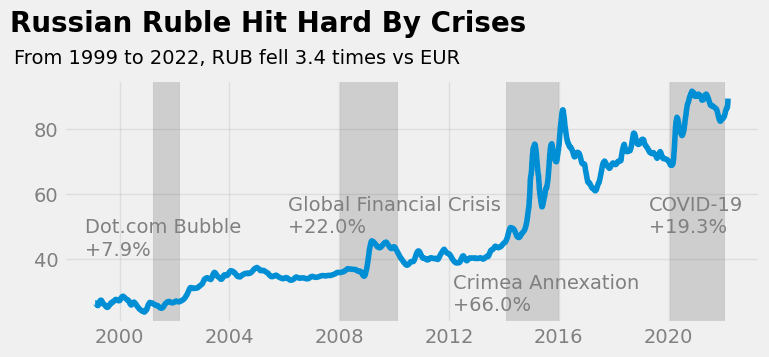

In [23]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(eur_to_rub['Time'],
         eur_to_rub['30d_MA'])

# Set colors of all ticks to grey
ax.tick_params(axis="both", colors="grey")

# Highlight the dot.com bubble burst
ax.axvspan(xmin=11400, xmax=11750,
           alpha=0.3, color='grey')
# Add text about aot.com bubble
ax.text(10500, 48, 'Dot.com Bubble', color='grey')
ax.text(10500, 41, s=('+' + str(dotcom_change) + '%'), color='grey')

# Highlight the global financial crisis
ax.axvspan(xmin=13890, xmax=14650,
           alpha=0.3, color='grey')
# Add text about financial crisis
ax.text(13200, 55, 'Global Financial Crisis', color='grey')
ax.text(13200, 48, s=('+' + str(crisis_change) + '%'), color='grey')

# Highlight the annexation of Crimea and sanctions
ax.axvspan(xmin=16100, xmax=16790,
           alpha=0.3, color='grey')
# Add text about Crimea annex
ax.text(15400, 31, 'Crimea Annexation', color='grey')
ax.text(15400, 24, s=('+' + str(crimea_change) + '%'), color='grey')

# Highlight COVID-19
ax.axvspan(xmin=18280, xmax=19000,
           alpha=0.3, color='grey')
# Add text about COVID
ax.text(18000, 55, 'COVID-19', color='grey')
ax.text(18000, 48, s=('+' + str(covid_change) + '%'), color='grey')

# Add title
ax.text(9500, 110, 'Russian Ruble Hit Hard By Crises', weight='bold', size=20)

# Add subtitle
ax.text(9550, 100,
        s=('From 1999 to 2022, RUB fell ' + str(total_change) + ' times vs EUR'))

ax.grid(alpha=0.5)

plt.show()

In summary, the Russian ruble has shown strong negative dynamics over the past 23 years, with global and local crises hitting the Russian economy and consequently the Russian currency hard.

# Conclusion

In this project, we set out to analyze the exchange rate dynamics of the EUR, USD, and RUB from 1999 to present, with a focus on visualizing the results. We approached this by analyzing the impact of quantitative easing by the US Federal Reserve on the EUR-USD exchange rate and studying the performance of the RUB against the EUR over the past 23 years.

Our findings indicate that all four rounds of QE had no significant impact on the EUR-USD exchange rate, with the rate recovering or depreciating in the following years. Meanwhile, the RUB has depreciated over three times against the EUR due to global and local crises affecting the Russian economy.

In conclusion, our analysis provides valuable insights into the exchange rate dynamics of the EUR, USD, and RUB. Our findings suggest that macroeconomic events and policies have a significant impact on currency performance. We hope that our visualizations and analysis have shed light on the complex dynamics of these three major currencies and provided a foundation for future research.